<a href="https://colab.research.google.com/github/PauFeld/AneuriskDataset/blob/master/Resamplemultiline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import de paquetes
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import sys
import os

# Numpy
import numpy as np
from skimage import color, io

import math

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/
%cd AneuriskDataset
%cd centerlineArray

ModuleNotFoundError: No module named 'google'

In [2]:
centerlines_list = []
for i in range(1, 100):
    centerlines_list.append('centerlines' + str(i) )

#Elimino las problematicas
centerlines_list.pop(31)#32
centerlines_list.pop(52)#54
centerlines_list.pop(88)#91
centerlines_list.pop(89)#93
centerlines_list.pop(90)#95

'centerlines95'

[35.48153305  3.83019328 61.53855896  1.75184402  0.        ]


(2840, 5)

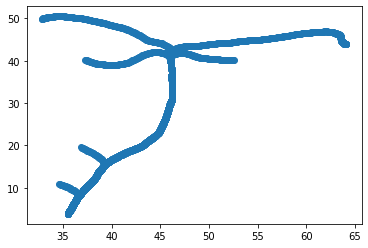

In [3]:
filename = "centerlines68"

#line = np.load(filename+".npy")#[:,0:3]
line = np.load( filename+".npy")

plt.scatter(line[:,0], line[:,1])

print(line[0])
line.shape

In [4]:
#Calculo distancia euclidea entre dos puntos susecivos
def Distance(pointA, pointB):
    xa, ya, za, ra, la = pointA
    xb, yb, zb, rb, lb = pointB
    dist = math.sqrt((xa-xb)**2+(ya-yb)**2+(za-zb)**2)
    return dist;

In [5]:
def LinearCurveLength(line):
    accum = 0
    npoints = line.shape[0]
    for point in range(0,npoints-1):
        pointA = line[point]
        pointB= line[point+1]
        accum = accum + Distance(pointA, pointB)
    return accum
        

In [6]:
def UniformLinearInterpolation(line, target_count):
    
    total_length = LinearCurveLength(line)
    segment_length = total_length / (target_count - 1);
    
    result = []
    
    src_segment_offset = 0
    start = 0
    finish = start + 1
    
    src_segment_length = Distance(line[start], line[finish]);
 
    for i in range (0, target_count):#target count es el numero de puntos final que quiero
        next_offset = segment_length * i;# i me dice en que numero de punto voy
        while(src_segment_offset + src_segment_length < next_offset-1 and finish < line.shape[0]-1):
            src_segment_offset += src_segment_length  #src_segment_offset es cuanta distancia voy
            start = finish
            finish = start+1
            src_segment_length = Distance(line[start], line[finish])
        
        
        if (line[start][4] != line[finish][4]):
          start = finish
          finish = start+1
          
        part_offset = next_offset - src_segment_offset;
        part_ratio = part_offset / src_segment_length;
 
        result.append((line[start][0] + part_ratio * (line[finish][0] - line[start][0]),
        line[start][1] + part_ratio * (line[finish][1] - line[start][1]),
        line[start][2] + part_ratio * (line[finish][2] - line[start][2])))


          
    return result

In [7]:
       
print('\n')

add = np.zeros((1024, 2))
print(add.shape)
interpolated = np.array(UniformLinearInterpolation(line, 1024))
interpolated2 = np.array(UniformLinearInterpolation(line, 512))
print(interpolated.shape)
interpolated = np.concatenate((interpolated, add), axis = 1)
print(interpolated.shape)
print("Interpolated Points:\n")

#for point in interpolated:
    #print (point)

print('\n')
print( "Source linear interpolated length:           ", LinearCurveLength(line), '\n')
print( "Interpolation's linear interpolated length:  ", LinearCurveLength(interpolated), '\n')

print( "Original number of points:                   ", line.shape[0], '\n')
print( "Interpolation's number of points:            ", interpolated.shape[0], '\n')

#np.save('ResampledMainCenterlines256/'+filename+'Resampled.npy', interpolated)



(1024, 2)
(1024, 3)
(1024, 5)
Interpolated Points:



Source linear interpolated length:            449.59343810421046 

Interpolation's linear interpolated length:   466.23086669651315 

Original number of points:                    2840 

Interpolation's number of points:             1024 



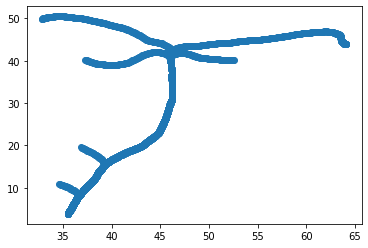

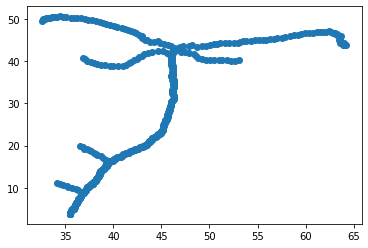

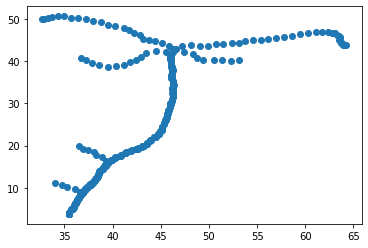

In [8]:
plt.scatter(line[:,0], line[:,1])
plt.show()
plt.scatter(interpolated[:,0], interpolated[:,1])
plt.show()
plt.scatter(interpolated2[:,0], interpolated2[:,1])
plt.show()


In [10]:
for line in centerlines_list:
    interpolated = np.array(UniformLinearInterpolation(np.load(line +".npy"), 8192))
    np.save('Resampled8192/'+line+'Resampled.npy', interpolated)